# Honey Production In The USA (1998-2012)

Group N -- PythonCamp

Xinyan Li (204-848-277)  Chen Wen (904-841-574)  Kyeongrim Song (704-850-932)

Presentation video link: https://youtu.be/lR4Asfdr8TI

PPT link: https://github.com/wenchen1996/STATS131/blob/master/STATS%20131%20Final%20Project.pdf

## Context and description of the data

### Background information on the subject and field of study.

The data explores measurements of honey production in the US. This is an area of concern because the dramatic reduction of the US honeybee population has impacted the industry. This reduction has occured due to Colony Collapse Disorder (CCD). Colony Collapse refers to a phenomenon in which healthy adult bees fail to return to their colony, leaving behind the queen and young bees and causing the sudden death of the colony. While some rate of colony collapse is seen as ecologically normal, in the 2000s the rates of collapse reached new heights. In 2006 many beekeepers noticed extreme losses in their honeybee populations, in some cases as high as 50-90 percent, and the phenomena was given the name CCD. Because of its devastating impact, it quickly became a global concern. Scientists have studied CCD and speculated about its causes and possible solutions, citing causes such as insecticides, habitat loss, climate change, and disease, but CCD has never been definitively explained. While CCD remains a problem, the honeybee population has recovered significantly, and 2007’s rates of CCD have not been seen since. Because honeybees are important crop pollinators, many agricultural industries were impacted by CCD. While most industries have recovered, the US honey industry still suffers. Previously, half of the honey consumed every year was produced by local bee farms. However, currently, 350 of the 400 million pounds of honey consumed every year originate from imports. This data explores measurements of the US honey industry from 1998 through 2012.

### Information about data collection.

Honey production data was collected and published by the National Agricultural Statistics Service (NASS) of the U.S. Department of Agriculture. NASS has conducted the Bee and Honey Inquiry survey annually since 1986. Our dataset includes the years 1998 through 2012. Before being merged and cleaned by Kaggle, the data was originally held in three raw data set found on NASS for the years 1998 to 2002, 2003 to 2007, and 2008 to 2012.

The National Agricultural Statistics Service collected data for honey producing operations using a census survey. They collected a stratified sample of all known producers with five or more colonies. NASS Field Offices maintain a list of all known honey producers and use known sources of producers to update their lists yearly. All sampled honey producers with five or more colonies are mailed a questionnaire and given adequate time to respond by mail or electronic data reporting (EDR). Those who do not respond by mail or EDR are telephoned or contacted in person. The measurements of each producer collected by NASS include the number of colonies, honey yield per colony, total honey production, stocks of honey held, price per pound, and value of production. Stocks under loan are not included, and prices are collected by color class and marketing channel. Certain states are excluded every year (ex. CT) to avoid disclosing data for individual operations. Due to rounding, total colonies multiplied by total yield may not equal production. Also, summation of states will not equal U.S. level value of production.

Because the data set is survey data, it is subject to sampling error and non-sampling errors, such as omissions, duplications, and mistakes in reporting, recording, and processing the data. Although the NASS applies quality controls for consistency and reasonableness, possible error contributes to greater uncertainty in any analysis of the data set.

*numcol: Number of honey producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies which did not survive the entire year*

*yieldpercol: Honey yield per colony. Unit is pounds.*

*totalprod: Total production (numcol x yieldpercol). Unit is pounds.*

*stocks: Refers to stocks held by producers. Unit is pounds.*

*priceperlb: Refers to average price per pound based on expanded sales. Unit is dollars.*

*prodvalue: Value of production (totalprod x priceperlb). Unit is dollars.*

## Exploratory Analysis of the Data

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
honey = pd.read_csv("honeyproduction.csv")

In [2]:
# Infromation of each variable count and type
print(honey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
state          626 non-null object
numcol         626 non-null float64
yieldpercol    626 non-null int64
totalprod      626 non-null float64
stocks         626 non-null float64
priceperlb     626 non-null float64
prodvalue      626 non-null float64
year           626 non-null int64
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB
None


In [3]:
# Summary statistics of each variable
print(honey.describe())

              numcol  yieldpercol     totalprod        stocks  priceperlb  \
count     626.000000   626.000000  6.260000e+02  6.260000e+02  626.000000   
mean    60284.345048    62.009585  4.169086e+06  1.318859e+06    1.409569   
std     91077.087231    19.458754  6.883847e+06  2.272964e+06    0.638599   
min      2000.000000    19.000000  8.400000e+04  8.000000e+03    0.490000   
25%      9000.000000    48.000000  4.750000e+05  1.430000e+05    0.932500   
50%     26000.000000    60.000000  1.533000e+06  4.395000e+05    1.360000   
75%     63750.000000    74.000000  4.175250e+06  1.489500e+06    1.680000   
max    510000.000000   136.000000  4.641000e+07  1.380000e+07    4.150000   

          prodvalue         year  
count  6.260000e+02   626.000000  
mean   4.715741e+06  2004.864217  
std    7.976110e+06     4.317306  
min    1.620000e+05  1998.000000  
25%    7.592500e+05  2001.000000  
50%    1.841500e+06  2005.000000  
75%    4.703250e+06  2009.000000  
max    6.961500e+07  2012.

### Clean the data

In [4]:
print(honey.isnull().values.sum())   #check NA

0


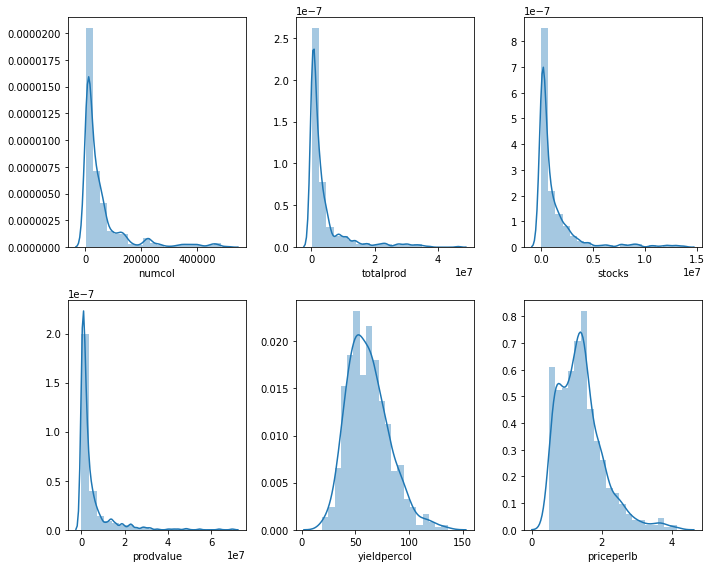

In [5]:
# Distrubition plot of original data
plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.distplot(honey["numcol"], bins = 20, kde = True)
plt.subplot(2,3,2)
sns.distplot(honey["totalprod"], bins = 20, kde = True)
plt.subplot(2,3,3)
sns.distplot(honey["stocks"], bins = 20, kde = True)
plt.subplot(2,3,4)
sns.distplot(honey["prodvalue"], bins = 20, kde = True)
plt.subplot(2,3,5)
sns.distplot(honey["yieldpercol"], bins = 20, kde = True)
plt.subplot(2,3,6)
sns.distplot(honey["priceperlb"], bins = 20, kde = True)
plt.tight_layout()

From the distribution plots above, we can obviously see that the variables "numcol", "totalprod", "stocks" and "prodvalue" are right skewed. 

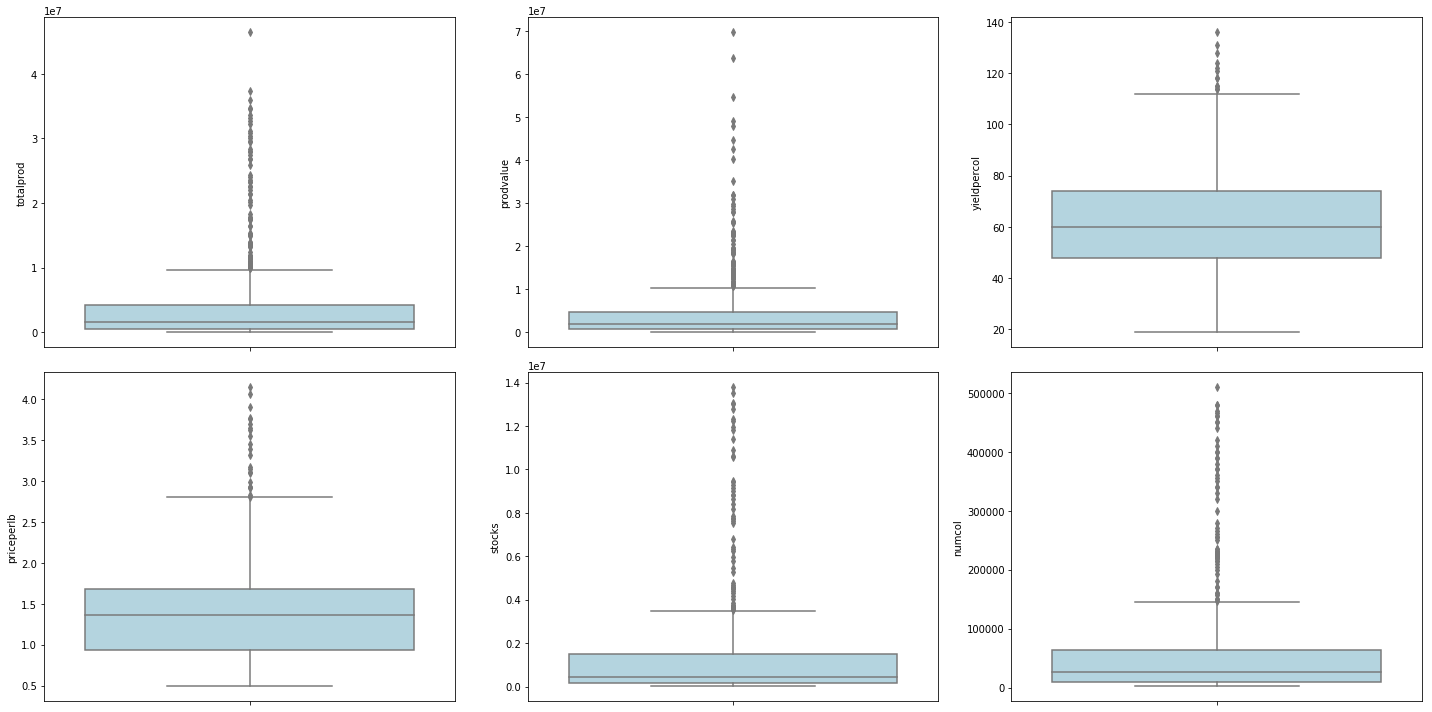

In [6]:
# Check boxplot to see the unusual features and outliers
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (20,10))
plt.subplot(2,3,1)
sns.boxplot(honey["totalprod"], orient = "v", color='lightblue')
plt.subplot(2,3,2)
sns.boxplot(honey["prodvalue"], orient = "v", color='lightblue')
plt.subplot(2,3,3)
sns.boxplot(honey["yieldpercol"], orient = "v", color='lightblue')
plt.subplot(2,3,4)
sns.boxplot(honey["priceperlb"], orient = "v", color='lightblue')
plt.subplot(2,3,5)
sns.boxplot(honey["stocks"], orient = "v", color='lightblue')
plt.subplot(2,3,6)
sns.boxplot(honey["numcol"], orient = "v", color='lightblue')
fig.tight_layout()
plt.show()

From the boxplot, we can find out that there are several outliers in each numeric variables. We normalize these variables by dropping points that are more than two standard deviations away from the mean of the data, and then taking log of the variables. 

In [7]:
# Eliminate outliers
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

totalprod = reject_outliers(honey['totalprod'])
honey_new1 = honey.loc[honey['totalprod'].isin(totalprod)]
prodvalue = reject_outliers(honey_new1['prodvalue'])
honey_new2 = honey_new1.loc[honey_new1['prodvalue'].isin(prodvalue)]
stocks = reject_outliers(honey_new2['stocks'])
honey_new3 = honey_new2.loc[honey_new2['stocks'].isin(stocks)]
numcol = reject_outliers(honey_new3['numcol'])
honey_new4 = honey_new3.loc[honey_new3['numcol'].isin(numcol)]
yieldpercol = reject_outliers(honey_new4['yieldpercol'])
honey_new5 = honey_new4.loc[honey_new4['yieldpercol'].isin(yieldpercol)]
priceperlb = reject_outliers(honey_new5['priceperlb'])
honey_new = honey_new5.loc[honey_new5['priceperlb'].isin(priceperlb)]

# Take log of the varibales that are skewed right
honey_new["numcol"] = np.log(honey_new["numcol"])
honey_new["totalprod"] = np.log(honey_new["totalprod"])
honey_new["prodvalue"] = np.log(honey_new["prodvalue"])
honey_new["stocks"] = np.log(honey_new["stocks"])
print(honey_new.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 0 to 625
Data columns (total 8 columns):
state          460 non-null object
numcol         460 non-null float64
yieldpercol    460 non-null int64
totalprod      460 non-null float64
stocks         460 non-null float64
priceperlb     460 non-null float64
prodvalue      460 non-null float64
year           460 non-null int64
dtypes: float64(5), int64(2), object(1)
memory usage: 32.3+ KB
None


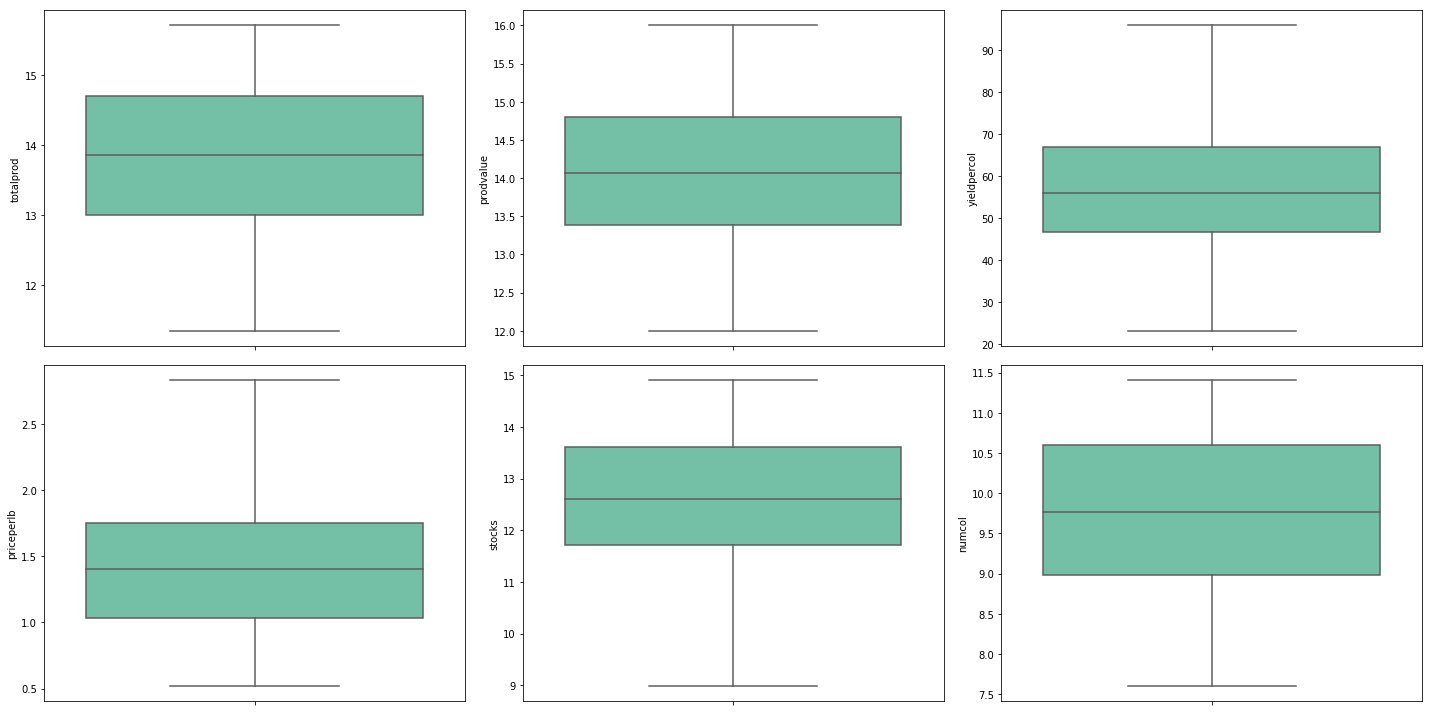

In [8]:
# Check boxplot again
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (20,10),)
plt.subplot(2,3,1)
sns.boxplot(honey_new["totalprod"], orient = "v",color='mediumaquamarine')
plt.subplot(2,3,2)
sns.boxplot(honey_new["prodvalue"], orient = "v",color='mediumaquamarine')
plt.subplot(2,3,3)
sns.boxplot(honey_new["yieldpercol"], orient = "v",color='mediumaquamarine')
plt.subplot(2,3,4)
sns.boxplot(honey_new["priceperlb"], orient = "v",color='mediumaquamarine')
plt.subplot(2,3,5)
sns.boxplot(honey_new["stocks"], orient = "v",color='mediumaquamarine')
plt.subplot(2,3,6)
sns.boxplot(honey_new["numcol"], orient = "v",color='mediumaquamarine')
fig.tight_layout()
plt.show()

The boxplot now looks better than before. The outliers of each variable is removed.

In [9]:
# Summary statistics of each variable in the cleaned data
print(honey_new.describe())

           numcol  yieldpercol   totalprod      stocks  priceperlb  \
count  460.000000   460.000000  460.000000  460.000000  460.000000   
mean     9.798921    58.019565   13.824221   12.616398    1.424043   
std      0.885827    15.257758    0.984068    1.209468    0.534283   
min      7.600902    23.000000   11.338572    8.987197    0.520000   
25%      8.987197    46.750000   12.994530   11.709719    1.030000   
50%      9.769548    56.000000   13.856651   12.594639    1.400000   
75%     10.596635    67.000000   14.696691   13.604790    1.752500   
max     11.407565    96.000000   15.710127   14.904073    2.830000   

        prodvalue         year  
count  460.000000   460.000000  
mean    14.102716  2004.778261  
std      0.903115     4.208453  
min     11.995352  1998.000000  
25%     13.386265  2001.000000  
50%     14.063927  2005.000000  
75%     14.794956  2008.000000  
max     16.002797  2012.000000  


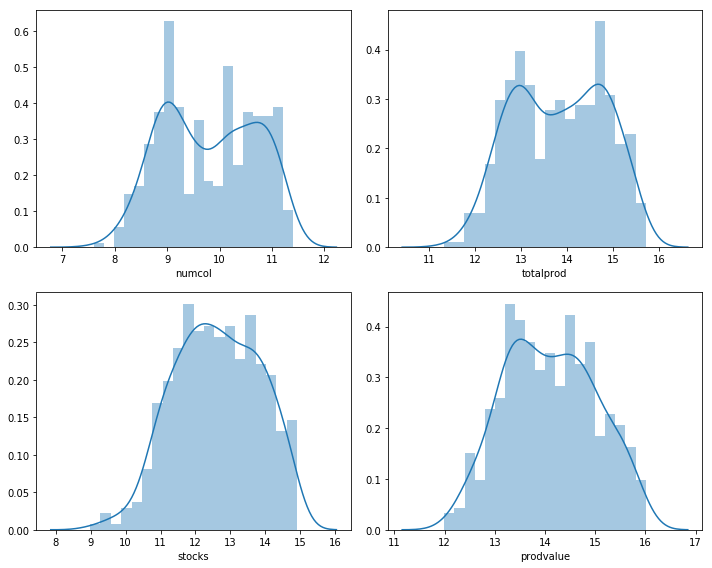

In [10]:
# Distribution plot of variables after taking the log 
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.distplot(honey_new["numcol"], bins = 20, kde = True)
plt.subplot(2,2,2)
sns.distplot(honey_new["totalprod"], bins = 20, kde = True)
plt.subplot(2,2,3)
sns.distplot(honey_new["stocks"], bins = 20, kde = True)
plt.subplot(2,2,4)
sns.distplot(honey_new["prodvalue"], bins = 20, kde = True)
plt.tight_layout()

Now, all variables look pretty normalized from the distribution plots above. The total entries are reduced from 626 to 460. The data is cleaned and we start to do further analysis.

### Guiding Question 1: How has honey production yield changed from 1998 to 2012?

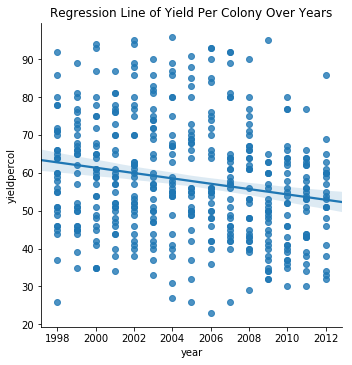

In [11]:
# Linear regression plot between year and yield per colony
sns.lmplot(x = "year", y = "yieldpercol", data = honey_new)
plt.title("Regression Line of Yield Per Colony Over Years")
plt.show()

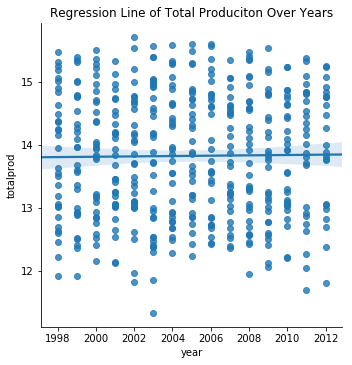

In [12]:
# Linear regression plot between year and total production
sns.lmplot(x = "year", y = "totalprod", data = honey_new)
plt.title("Regression Line of Total Produciton Over Years")
plt.show()

The two plots above give us a general sense that honey production yields per colony decreased from 1988 to 2012, while the total production kept the same overall during these years. 

In [13]:
# Mean of each year's yield per colony and total production
mean = honey_new.groupby('year')['yieldpercol', 'totalprod'].mean()
print(mean)

      yieldpercol  totalprod
year                        
1998    60.354839  13.845131
1999    60.225806  13.818994
2000    60.483871  13.871806
2001    59.531250  13.711348
2002    62.181818  13.799710
2003    60.647059  13.734910
2004    60.687500  13.870110
2005    59.741935  13.934338
2006    60.354839  13.903963
2007    58.645161  13.771040
2008    57.058824  13.820603
2009    49.433333  13.662773
2010    52.655172  13.794965
2011    51.740741  13.917923
2012    53.347826  13.957944


Calculating the mean of honey production yield per colony and total honey production by years, we find that the mean total production every year keeps the smooth level, but the mean honey production yield per colony varies by year. The mean yield per colony sharply increased to 62.18 in 2002 and then back to the previous level in 2003. From 2007, it decline gradually comparing to the previous years. In the year of 2009, it suddenly decreaased to 49.43, which came to the lowest amount during these years. Though reached back to 53.35 in 2012, it was still much lower than that of the years from 1998 to 2006. 

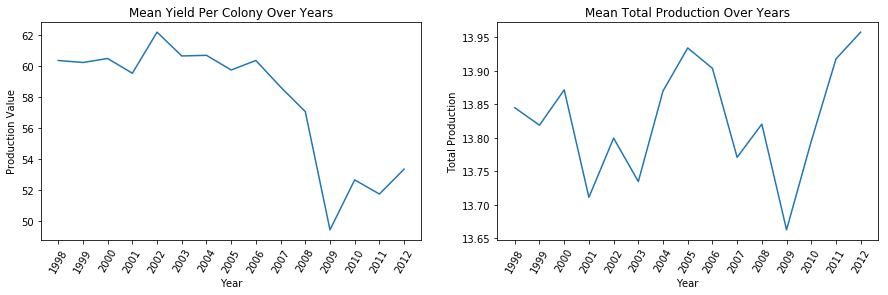

In [14]:
# Lineplot of mean yield per colony and total production change over years
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
year = ["1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012"]
plt.plot(year, mean["yieldpercol"])
plt.xlabel('Year')
plt.xticks(rotation = 60)
plt.ylabel("Production Value")
plt.title("Mean Yield Per Colony Over Years")
plt.subplot(1,2,2)
year = ["1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012"]
plt.plot(year, mean["totalprod"])
plt.xlabel('Year')
plt.xticks(rotation = 60)
plt.ylabel("Total Production")
plt.title("Mean Total Production Over Years")
plt.show()

Converting the table above to plots, we can clearly see the changes of the means during these years. The mean yield per colony in 2002 came to the highest level from 1998 to 2012. Starting from 2006, the mean yield per colony had an obviously overall downward trend. It decreased from 60 to 50 among these 4 years and reached to the lowest level in 2009. Not until 2011 did the mean yield per colony back to the continuously rising trend again. 

The mean total production shocks significantly during these years. It plunged in 2001 compared with which in 2000, but exploded in 2005 again. The mean total peoduction reached a peak in 2005. Afterwards, it had a sharp fall from 2006. The total production came to the lowest level in 2009, and then in 2010 it quickly picked up. At the year of 2012, the mean total production reached the higest level from 1998 to 2012. 

### Guiding Question 2: Over time, which states produce the most honey? Which produce the least? Which have experienced the most change in honey yield?

In [15]:
# Sum of each state's total production
state = honey[['state', 'totalprod']].groupby('state').sum()
state.reset_index(level = 0, inplace = True)
state.sort_values(by = 'totalprod', ascending = False, inplace = True)

# Top 5 states with high total production
print(state.head())

   state    totalprod
23    ND  475085000.0
3     CA  347535000.0
34    SD  266141000.0
5     FL  247048000.0
21    MT  156562000.0


In [16]:
# Tail 5 states with low total production
print(state.tail())

   state  totalprod
16    ME  3701000.0
13    KY  3445000.0
15    MD  1266000.0
30    OK  1207000.0
33    SC  1030000.0


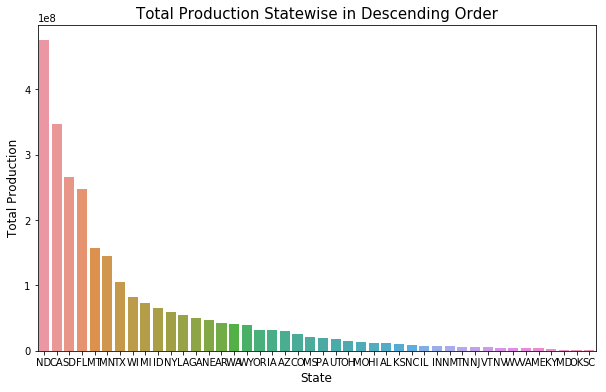

In [17]:
# Barplot of total prodution statewise in descending order
plt.figure(figsize=(10,6))
sns.barplot(x = 'state', y = 'totalprod', data = state)
plt.title('Total Production Statewise in Descending Order', fontsize = 15)
plt.xlabel("State", fontsize = 12)
plt.ylabel("Total Production", fontsize = 12)
plt.show()

According to the tables and plots above, North Dakota produced the most honey. California and South Dakota produced the second and the third amount of honey respectively. South Carolina produced the least. 

In [18]:
# Calculte maximum and minimum of each state's yield per colony
state_max = honey[['state', 'yieldpercol']].groupby('state').max()
state_max.reset_index(level = 0, inplace = True)
state_max.columns = ['State','Maximum Yield']
state_min = honey[['state', 'yieldpercol']].groupby('state').min()
state_min.reset_index(level = 0, inplace = True)
state_min.columns = ['State','Minimum Yield']
merge = state_max.merge(right = state_min, on = 'State')

# Calculte change each state's percentage in total production 
merge['Change Percentage'] = ((merge['Maximum Yield']-merge['Minimum Yield'])/merge['Maximum Yield'])*100
merge.sort_values(by = 'Change Percentage', ascending = False, inplace = True)
print(merge.head())

   State  Maximum Yield  Minimum Yield  Change Percentage
25    NJ             57             19          66.666667
11    IN             92             32          65.217391
43    WY             93             36          61.290323
34    SD            121             47          61.157025
3     CA             83             33          60.240964


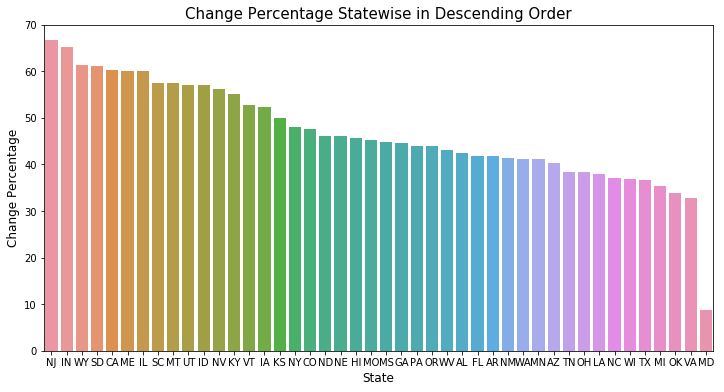

In [19]:
# Barplot of change percentage statewise in descending order
plt.figure(figsize=(12,6))
sns.barplot(x = 'State', y = 'Change Percentage', data = merge)
plt.title('Change Percentage Statewise in Descending Order', fontsize = 15)
plt.xlabel("State", fontsize = 12)
plt.ylabel("Change Percentage", fontsize = 12)
plt.show()

According to the tables and plots above, New Jersey has experienced the most change in honey yield. Its change percentage reached 66.67%. The second position is Indiana and Wyoming is the third. 

### Guiding Question 3: Are there any patterns that can be observed between total honey production and value of production every year? How has value of production, which in some sense could be tied to demand, changed every year?

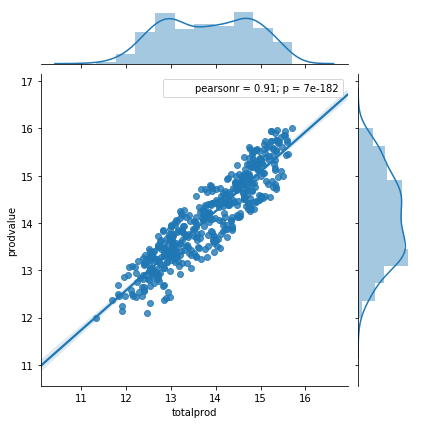

In [20]:
# Regression and distribution plot between total productionand and value of production
sns.jointplot(x = "totalprod", y = "prodvalue", kind = "reg", data = honey_new)
plt.show()

From the plot above, we can see that the total honey production has a positive linear relationship with the total value of production. The corelation of the two varibales is 0.91, so they are very related to each other. The total value of preduction will increase when the total honey production increase. 

In [21]:
# Create new varibale demand which how much honey is sold
honey_new['demand'] = honey_new['totalprod']-honey_new['stocks']
mean_demand = honey_new.groupby('year')['demand'].mean()
print(mean_demand)

year
1998    0.956378
1999    0.999304
2000    0.944936
2001    1.104615
2002    1.422252
2003    1.431562
2004    1.159151
2005    1.060450
2006    1.103988
2007    1.146573
2008    1.273948
2009    1.378509
2010    1.394883
2011    1.383746
2012    1.413402
Name: demand, dtype: float64


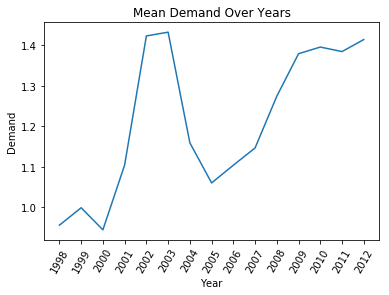

In [22]:
# Line plot of mean demand changes over years
year = ["1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012"]
plt.plot(year, mean_demand)
plt.xlabel('Year')
plt.xticks(rotation = 60)
plt.ylabel("Demand")
plt.title("Mean Demand Over Years")
plt.show()

We get the new variable "demand" by substracting "stocks" from "totalprod". According to the plot above, we can see that the mean demand reached the highest level in 2003. Then, it shows a "v" shape from 2003 to 2009 and the mean demand of 2005 is the lowest level of the "v" shape. After 2009, the mean demand returned to the original level and had a slow rise year by year.

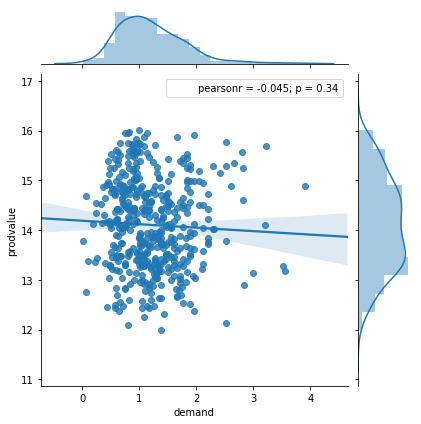

In [23]:
# Regression and distribution plot between demand and value of production
sns.jointplot(x = "demand", y = "prodvalue", kind = "reg", data = honey_new)
plt.show()

According to the plot, value of production has no linear relationship with demand. Their corelation is -0.045 and p-value is 0.34. Therefore, the value of production doesn't change as the demand does.

## Data Modeling

###  Fit statistical models to the data for insight

#### Model 1: How total production is affected by stocks and average price per pound?

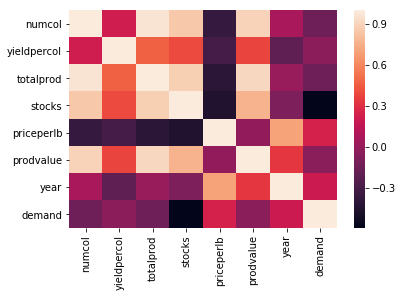

In [24]:
corr = honey_new.corr()
sns.heatmap(corr)
plt.show()

According to the correlation heatmap, total production has high correlation with numcol, yieldpercol, stocks, priceperlb. Because the total production is muptiple of numcol and yieldpercol, we will not include this two variables in the model and only choose variables stocks and priceperlb. As the response variable and explanatory variables are all numeric, we choose linear regression model to fit the data.

In [25]:
# Linear model with response variable total production and explanatory variables stocks and priceprelb
model1 = smf.ols('totalprod ~ stocks + priceperlb', data = honey_new)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:              totalprod   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     789.6
Date:                Mon, 11 Jun 2018   Prob (F-statistic):          5.30e-149
Time:                        23:41:26   Log-Likelihood:                -301.16
No. Observations:                 460   AIC:                             608.3
Df Residuals:                     457   BIC:                             620.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8894      0.291     16.824      0.0

Model:  log(totalprod) = 4.8894 + 0.7112 * log(stocks) - 0.0265 * priceperlb. 

The adjusted R-squared is 0.775, which means 77.5% variations in dependent variable Y (log(totalprod)) are explained by the independent variables present in the model (log(stocks), priceperlb).

Keep all other variables constant, when the log of stocks increase by 1 unit, we expect the log of total production will increase by 0.7112 unit. Similarly, when the priceperlb increase by 1 unit, we expect the log of total production will decrease by 0.0265 unit. The intercept is 4.8894, which means when the log of stocks and priceperlb are 0, we expect the log of total production will be 4.8894.

#### Model 2: How stocks is affected by number of colony, yield per colony and average price per pound?

According to the correlation heatmap, stocks has high correlation with numcol, yieldpercol, totalprod and priceperlb. Because the total production is muptiple of numcol and yieldpercol, we will not include totalprod in the model and only choose those variables numcol, yieldpercol and priceperlb. As the response variable and explanatory variables are all numeric, we choose linear regression model to fit the data.

In [26]:
model2 = smf.ols('stocks ~ numcol + yieldpercol + priceperlb', data = honey_new)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                 stocks   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     543.5
Date:                Mon, 11 Jun 2018   Prob (F-statistic):          3.89e-150
Time:                        23:41:27   Log-Likelihood:                -389.91
No. Observations:                 460   AIC:                             787.8
Df Residuals:                     456   BIC:                             804.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.8136      0.360      5.033      

Model: log(stocks) = 1.8136 + 1.0487 * log(numcol) + 0.0153 * yieldpercol - 0.2539 * priceperlb.

The adjusted R-squared is 0.780, which means 78% variations in dependent variable Y (log(stocks)) are explained by the independent variables present in the model (log(numcol), yieldpercol, priceperlb).

Keep all other variables constant, when the log of number of honey producing colonies increase by 1 unit, we expect the log of stocks will increase by 1.0487 unit. Similarly, when the yield per colony increase by 1 unit, we expect the log of stocks will increase by 0.0153 unit. When the price per lb increase by 1 unit, we expect the log of stocks will decrease by 0.2539 unit. The intercept is 1.8136, which means when the log of number of honey producing colonies, yield per colony and priceperlb are 0, we expect the log of stocks will be 1.8136.

### Fit statistical models to the data for prediction

#### Use linear regression model 1 to predict the total production.

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = honey_new[['priceperlb', 'stocks']].values
y = honey_new['totalprod'].values
reg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) 
reg.fit(X_train, y_train) 
y_pred = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 0.4722185896105954


In [28]:
print("R^2: {}".format(reg.score(X_test, y_test)))

R^2: 0.7529440780143568


Root Mean Squared Error (RMSE) is the standard deviation of the unexplained variance. It indicates the absolute fit of the model to the data – how close the observed data points are to the model’s predicted values. It is a good measure of how accurately the model predicts the response. Lower values of RMSE indicate better fit. From the output, RMSE is 0.4722, which is a pretty small value. 

R-squared indicates the goodness of fit of the model. It has the useful property that its scale is intuitive: it ranges from zero to one, with zero indicating that the proposed model does not improve prediction over the mean model, and one indicating perfect prediction. From the output, R^2 is 0.996, which is very close to one. 

Therefore, according to these two results above, the model can predict well. 

In [29]:
cv_scores = cross_val_score(reg, X, y, cv = 5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.72342414 0.62621496 0.8311957  0.83909014 0.73425482]
Average 5-Fold CV Score: 0.7508359532701079


Cross Validation indicates how accurately a predictive model will perform in practice. The higher the CV score is , the better the model fits. From the output, the average 5-Fold CV Score is 0.7508, which is kind high. Therefore, the model fits very well. 